## Cosinor Regression Model for "Episode Analysis"
This is the Cosinor Regression model used for the new sample datasets that contain the daily episode of TR-PTSD symptoms.

### SetUp

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from CosinorPy import file_parser, cosinor, cosinor1

### Data Cleaning for Cosinor Model Use

In [17]:
def load_data(path):
    """Function used to parser the data using the file_parser method from the CosinorPy package"""
    df = pd.read_csv(path)
    df['Region start time'] = pd.to_datetime(df['Region start time'])
    df['date'] = df['Region start time'].dt.date
    df['hour'] = df['Region start time'].dt.hour
    df = df.drop('Unnamed: 0', axis=1)
    print(df)
    return df

def to_matrix(df, event_col, min_valid_hours = 12):
    # Pivot to days x hours
    matrix = df.pivot(index='date', columns='hour', values=event_col)
    matrix = matrix.interpolate(axis=1, limit_direction='both')
    matrix = matrix[matrix.count(axis=1) >= min_valid_hours]
    matrix = matrix.fillna(0)
    print(matrix)
    return matrix

In [18]:
pre_data = load_data("data/RNS_G_Pre_output.csv")
post_data = load_data("data/RNS_G_M1_output.csv")

      Region start time  Pattern A Channel 2  Episode starts with RX  \
0   2024-11-19 10:00:00                    0                       0   
1   2024-11-19 11:00:00                   19                       0   
2   2024-11-19 12:00:00                   38                       0   
3   2024-11-19 13:00:00                    1                       0   
4   2024-11-19 14:00:00                    3                       0   
..                  ...                  ...                     ...   
705 2024-12-18 19:00:00                   40                       0   
706 2024-12-18 20:00:00                   68                       0   
707 2024-12-18 21:00:00                   87                       0   
708 2024-12-18 22:00:00                   77                       0   
709 2024-12-18 23:00:00                   15                       0   

           date  hour  
0    2024-11-19    10  
1    2024-11-19    11  
2    2024-11-19    12  
3    2024-11-19    13  
4    2024-11-19

In [19]:
pre_matrix = to_matrix(pre_data, "Pattern A Channel 2")
post_matrix = to_matrix(post_data, "Pattern A Channel 2")

hour           0      1      2      3      4      5      6      7      8   \
date                                                                        
2024-11-19    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2024-11-20    9.0    9.0   20.0   57.0   25.0   35.0   37.0   58.0   40.0   
2024-11-21   34.0   19.0   12.0   17.0   34.0   49.0   41.0   43.0   32.0   
2024-11-22    1.0   14.0    1.0    7.0  251.0  153.0  254.0   39.0  235.0   
2024-11-23    0.0    0.0   57.0    1.0  199.0  254.0   56.0  174.0  112.0   
2024-11-24    0.0   58.0  254.0    0.0    0.0  202.0  254.0   64.0   15.0   
2024-11-25   86.0  254.0   35.0   36.0  185.0   49.0   21.0  109.0    5.0   
2024-11-26    1.0  230.0  136.0    0.0  254.0  146.0    1.0    0.0    0.0   
2024-11-27    0.0   18.0   71.0  105.0   26.0   83.0    0.0   71.0   12.0   
2024-11-28    0.0   27.0   70.0   81.0   18.0  122.0   37.0    0.0    0.0   
2024-11-29    0.0   29.0   50.0   37.0    4.0    4.0   13.0   22.0    3.0   

### Cosinor Model Analysis- Overview

This setting has the following features:
    1. Date and time was combined using the format of decimals: specific hours were converted into decimal places of the given days
    2. The combined timeline is the x-axis and the test data (Pattern A Channel 2 or Episode starts with RX) is the y-axis

#### Function definition

In [20]:
def cosinor_regression1(df):
    """Basic Cosinor Regression Model used for the episode data (Pattern A Channel 2), normalizing time into a consecutive arithmetic timestamp."""
    df1 = df.copy()
    df1["test"] = df1["Pattern A Channel 2"]
    df1["x"] = df1["Region start time"]  # use this datetime field
    df1["y"] = df1["date"]

    # Convert Region start time to fractional days since first timepoint
    df1["x"] = pd.to_datetime(df1["x"])  # ensure proper datetime format
    t0 = df1["x"].min()
    df1["x"] = df1["x"].apply(lambda t: (t - t0).total_seconds() / (24 * 3600))  # days as float

    # Optional: Convert y to numeric if needed
    df1["y"] = df1["y"].apply(lambda x: x.toordinal() if hasattr(x, "toordinal") else x)

    df1 = df1.drop(["Pattern A Channel 2", "Episode starts with RX", "date", "hour"], axis=1)
    print(df1)

    cosinor.fit_me(df1["x"], df1["test"])

def cosinor_regression2(df):
    """Basic Cosinor Regression Model used for the episode data (Episode starts with RX), normalizing time into a consecutive arithmetic timestamp."""
    df1 = df.copy()
    df1["test"] = df1["Episode starts with RX"]
    df1["x"] = df1["Region start time"]  # use this datetime field
    df1["y"] = df1["date"]

    # Convert Region start time to fractional days since first timepoint
    df1["x"] = pd.to_datetime(df1["x"])  # ensure proper datetime format
    t0 = df1["x"].min()
    df1["x"] = df1["x"].apply(lambda t: (t - t0).total_seconds() / (24 * 3600))  # days as float

    # Optional: Convert y to numeric if needed
    df1["y"] = df1["y"].apply(lambda x: x.toordinal() if hasattr(x, "toordinal") else x)

    df1 = df1.drop(["Pattern A Channel 2", "Episode starts with RX", "date", "hour"], axis=1)
    print(df1)

    cosinor.fit_me(df1["x"], df1["test"])


#### Pre_data Analysis (Before Stimulus)

      Region start time  test          x       y
0   2024-11-19 10:00:00     0   0.000000  739209
1   2024-11-19 11:00:00    19   0.041667  739209
2   2024-11-19 12:00:00    38   0.083333  739209
3   2024-11-19 13:00:00     1   0.125000  739209
4   2024-11-19 14:00:00     3   0.166667  739209
..                  ...   ...        ...     ...
705 2024-12-18 19:00:00    40  29.375000  739238
706 2024-12-18 20:00:00    68  29.416667  739238
707 2024-12-18 21:00:00    87  29.458333  739238
708 2024-12-18 22:00:00    77  29.500000  739238
709 2024-12-18 23:00:00    15  29.541667  739238

[710 rows x 4 columns]


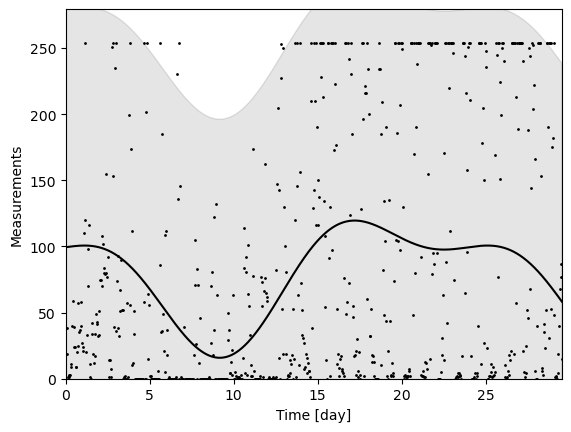

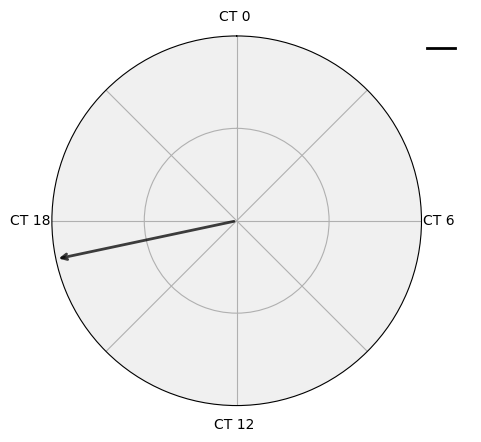

In [21]:
cosinor_regression1(pre_data)

#### Post_data Analysis (After Stimulus)

      Region start time  test          x       y
0   2024-12-19 16:00:00     8   0.000000  739239
1   2024-12-19 17:00:00     8   0.041667  739239
2   2024-12-19 18:00:00    19   0.083333  739239
3   2024-12-19 19:00:00    45   0.125000  739239
4   2024-12-19 20:00:00   123   0.166667  739239
..                  ...   ...        ...     ...
651 2025-01-15 19:00:00    92  27.125000  739266
652 2025-01-15 20:00:00   128  27.166667  739266
653 2025-01-15 21:00:00   162  27.208333  739266
654 2025-01-15 22:00:00    49  27.250000  739266
655 2025-01-15 23:00:00   101  27.291667  739266

[656 rows x 4 columns]


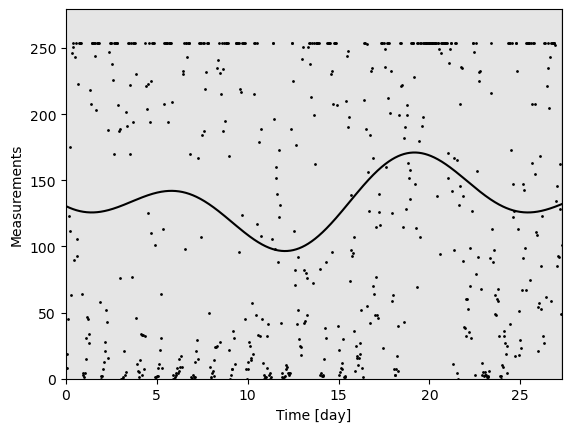

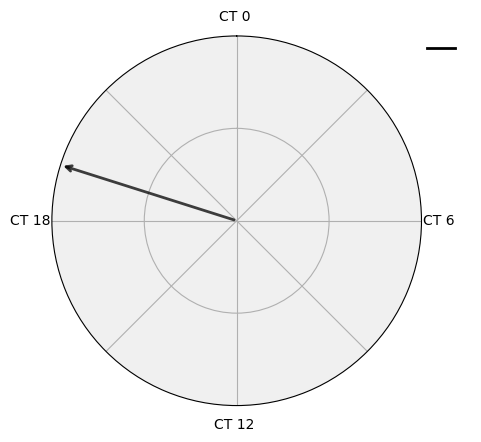

      Region start time  test          x       y
0   2024-12-19 16:00:00     5   0.000000  739239
1   2024-12-19 17:00:00     8   0.041667  739239
2   2024-12-19 18:00:00    19   0.083333  739239
3   2024-12-19 19:00:00    45   0.125000  739239
4   2024-12-19 20:00:00   123   0.166667  739239
..                  ...   ...        ...     ...
651 2025-01-15 19:00:00    93  27.125000  739266
652 2025-01-15 20:00:00   127  27.166667  739266
653 2025-01-15 21:00:00   163  27.208333  739266
654 2025-01-15 22:00:00    49  27.250000  739266
655 2025-01-15 23:00:00   101  27.291667  739266

[656 rows x 4 columns]


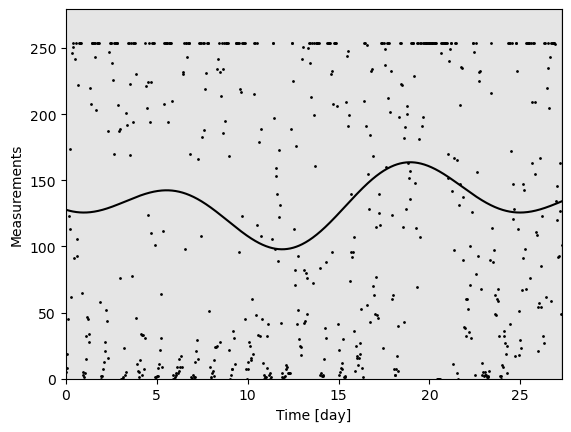

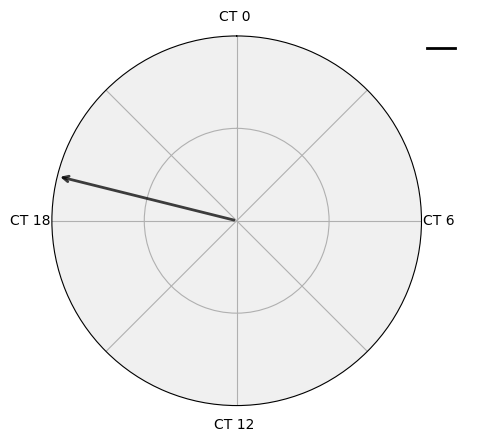

In [22]:
cosinor_regression1(post_data)
cosinor_regression2(post_data)

#### Overall Analysis merging two datasets

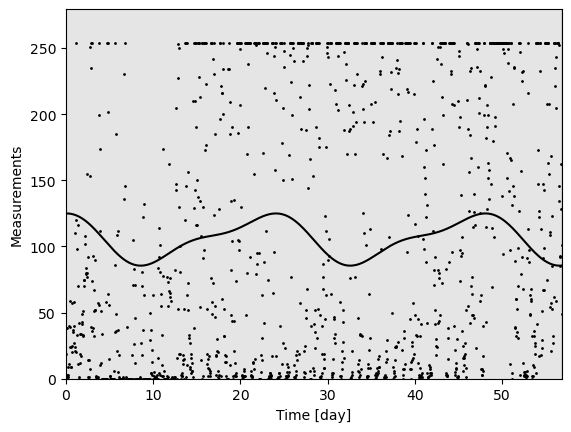

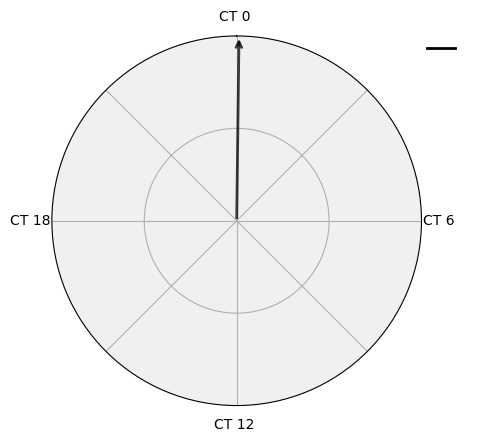

In [23]:
def cosinor_both(df1, df2):
    """Concatenate two dataframes and fit a Cosinor regression model."""
    # df1 dataset cleaning and preparation
    df1_copy = df1.copy()
    df1_copy["test"] = df1_copy["Pattern A Channel 2"]
    df1_copy["x"] = df1_copy["Region start time"]  # use this datetime field
    df1_copy["y"] = df1_copy["date"]

    # Convert Region start time to fractional days since first timepoint
    df1_copy["x"] = pd.to_datetime(df1_copy["x"])  # ensure proper datetime format
    t0 = df1_copy["x"].min()
    df1_copy["x"] = df1_copy["x"].apply(lambda t: (t - t0).total_seconds() / (24 * 3600))  # days as float
    df1_copy["y"] = df1_copy["y"].apply(lambda x: x.toordinal() if hasattr(x, "toordinal") else x)

    df1_copy = df1_copy.drop(["Pattern A Channel 2", "Episode starts with RX", "date", "hour"], axis=1)
    
    x_shift = df1_copy["x"].max()

    # df2 dataset cleaning and preparation
    df2_copy = df2.copy()
    df2_copy["test"] = df2_copy["Pattern A Channel 2"]
    df2_copy["x"] = df2_copy["Region start time"]  # use this datetime field
    df2_copy["y"] = df2_copy["date"]

    # Convert Region start time to fractional days since first timepoint
    df2_copy["x"] = pd.to_datetime(df2_copy["x"])  # ensure proper datetime format
    t0 = df2_copy["x"].min()
    df2_copy["x"] = df2_copy["x"].apply(lambda t: (t - t0).total_seconds() / (24 * 3600))  # days as float
    df2_copy["y"] = df2_copy["y"].apply(lambda x: x.toordinal() if hasattr(x, "toordinal") else x)

    df2_copy = df2_copy.drop(["Pattern A Channel 2", "Episode starts with RX", "date", "hour"], axis=1)

    df2_copy["x"] += x_shift  # shift x-axis to be consecutive
    # Step 2: Concatenate
    df_full = pd.concat([df1_copy, df2_copy], ignore_index=True)
    # Step 3: Plot or fit
    cosinor.fit_me(df_full["x"], df_full["test"])

cosinor_both(pre_data, post_data)

### Plots and Analysis